In [3]:
import sys;sys.path.append('./src')
import sqlite3
import re
from control_db import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import re 
from collections import Counter

In [4]:
low_category_db='../data/database/1112_low_prodcuts_text_category.db'
high_category_db='../data/database/1112_high_prodcuts_text_category.db'
Hconn2,Hc2=get_db_conn(high_category_db)
Lconn2,Lc2=get_db_conn(low_category_db)
Lc2.execute('''select * from sqlite_master''')
for row in Lc2:
    print(row)

('table', 'product_text', 'product_text', 2, 'CREATE TABLE product_text(id integer primary key,username,baka_star,each_id,pd_url,pd_star,pd_title,text_len,pd_text, category1, category2, category3, category4, category5, category6, category7, category8, category9, category10)')


In [5]:
Hc2.execute('''select distinct id,category1,category2,category3,category4,category5,category6,category7 from product_text where category6!='' ''')
i=0
for row in Hc2:
    print(row)
    i+=1
    if i==100:
        break


(54, 'ホーム＆キッチン', '家電', '消耗品・アクセサリ', '理美容家電消耗品・アクセサリ', 'デンタルケア家電アクセサリ', '電動歯ブラシ用アクセサリ', '替えブラシ')
(95, '服＆ファッション小物', 'レディース', 'インナーウェア・ルームウェア', 'インナーウェア', '補正下着', 'コルセット・ウエストニッパー', '')
(193, '俺たちは天使じゃない', '(字幕版)', 'アトランティスのこころ', '(字幕版)', 'ペーパー・ムーン', '(字幕版)', 'めまい')
(265, 'ビューティー', 'スキンケア・ボディケア', 'スキンケア・基礎化粧品', '洗顔', '洗顔料', '液体・クリーム洗顔料', '')
(274, 'ビューティー', 'スキンケア・ボディケア', 'スキンケア・基礎化粧品', '洗顔', '洗顔料', '泡洗顔料', '')
(360, 'ハードカバー', '￥', '5,235', 'より', '￥', '5,235', 'より')
(362, '洋書', 'Politics', '&', 'Social', 'Sciences', 'Politics', '&')
(526, '参考価格:', '￥', '3,024', 'OFF:', '￥', '524', '(17%)')
(645, '単行本', '￥', '1', 'より', '￥', '1', 'より')
(667, '洋書', "Children's", 'Books', 'Holidays', '&', 'Celebrations', '')
(1145, 'ホーム＆キッチン', 'キッチン用品', '調理・製菓道具', '調理器具', 'その他の調理器具', 'ロート', '')
(1151, 'GHOST', 'IN', 'THE', 'SHELL/攻殻機動隊', '(レンタル版)', 'オリエント急行殺人事件', '(字幕版)')
(1153, 'ホーム＆キッチン', '家電', '消耗品・アクセサリ', '生活家電消耗品・アクセサリ', '掃除機用アクセサリ', '掃除機用バッテリー', '')
(1163, 'プライムで視聴できます', 'アイアン・スカイ(字幕版)', 'プライムで視聴できます', 

In [6]:
Lc2.execute('''
select distinct id,category1,category2,category3,category4,category5,category6,category7
from product_text
where category1!='プ'  ''')


i=0
for row in Lc2:
    print(row)
    i+=1
    if i==100:
        break


(1, 'ホーム＆キッチン', '旅行用品', '旅行用品･旅行小物', '', '', '', '')
(2, 'おもちゃ', 'おもちゃ雑貨・手品', 'カプセル玩具', '', '', '', '')
(3, 'ホビー', '食玩', '', '', '', '', '')
(4, '本', '人文・思想', '倫理学・道徳', '', '', '', '')
(5, '食品・飲料・お酒', 'スイーツ・スナック菓子', 'ビスケット・クッキー', '', '', '', '')
(6, '食品・飲料・お酒', 'スイーツ・スナック菓子', '和菓子', 'もち菓子', '', '', '')
(7, '本', '雑誌', '男性ファッション・ライフスタイル', '', '', '', '')
(8, 'おもちゃ', 'おもちゃ雑貨・手品', 'カプセル玩具', '', '', '', '')
(9, 'おもちゃ', 'おもちゃ雑貨・手品', 'カプセル玩具', '', '', '', '')
(10, '本', 'コミック・ラノベ・BL', 'コミック', '', '', '', '')
(11, 'ホビー', '食玩', '', '', '', '', '')
(12, 'ホビー', 'プラモデル・模型', 'ロボット', '', '', '', '')
(13, '家電＆カメラ', '携帯電話・スマートフォン', '携帯電話・スマートフォンアクセサリ', 'ケース・カバー', '', '', '')
(14, '本', '雑誌', '男性ファッション・ライフスタイル', '', '', '', '')
(15, 'シューズ＆バッグ', 'バッグ・スーツケース', 'レディースバッグ・財布', 'バッグ小物', 'ポーチ', '', '')
(16, 'パソコン・周辺機器', 'PCパーツ', 'TVチューナー・キャプチャーボード', '', '', '', '')
(17, 'Kindleストア', 'Kindle本', 'マンガ', '', '', '', '')
(18, '家電＆カメラ', 'テレビ・レコーダー', 'ビデオデッキ', 'VHSビデオデッキ', '', '', '')
(19, 'Kindleストア', 'Kindle本', 'マン

In [7]:
Lc2.execute('''select distinct category1,category2,category3,category4 from product_text ''')
Hc2.execute('''select distinct category1,category2,category3,category4 from product_text ''')

low_category=[x[0] for x in Lc2]
high_category=[x[0] for x in Hc2]

low_counter=Counter(low_category)
high_counter=Counter(high_category)


In [ ]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.font_manager._rebuild()

In [ ]:
Lvalues,Lcounts=list(zip(*low_counter.most_common(30)))

#20字以上のラベルは除去している
Lvalues=[x[:20] for x in Lvalues]

plt.style.use('ggplot')
plt.rcParams.update({'font.size':18})
#日本語対応FONT
plt.rcParams['font.family'] = 'IPAPGothic'

size=(8,8)
col=cm.Spectral(np.arange(len(Lcounts))/float(len(Lcounts))) #color指定はcolormapから好みのものを。

plt.figure(figsize=size,dpi=200)
plt.pie(Lcounts,colors=col,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.9)
plt.legend(Lvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('低評価category1.png',bbox_inches='tight',pad_inches=0.05)

In [9]:
Hvalues,Hcounts=list(zip(*high_counter.most_common(30)))

#20字以上のラベルは除去している
Hvalues=[x[:20] for x in Hvalues]

plt.style.use('ggplot')
plt.rcParams.update({'font.size':18})
#日本語対応FONT
plt.rcParams['font.family'] = 'IPAPGothic'

size=(8,8)
col=cm.Spectral(np.arange(len(Hcounts))/float(len(Hcounts))) #color指定はcolormapから好みのものを。

plt.figure(figsize=size,dpi=200)
plt.pie(Hcounts,colors=col,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.9)
plt.legend(Hvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('高評価category1.png',bbox_inches='tight',pad_inches=0.05)

In [25]:
def sql_to_value_count(c,sql_text,category_len=20,category_num=30):
    c.execute(sql_text)
    category=[x[0] for x in c]
    counter=Counter(category)
    values,counts=list(zip(*counter.most_common(category_num)))
    values=[x[:20] for x in values]
    return(values,counts)

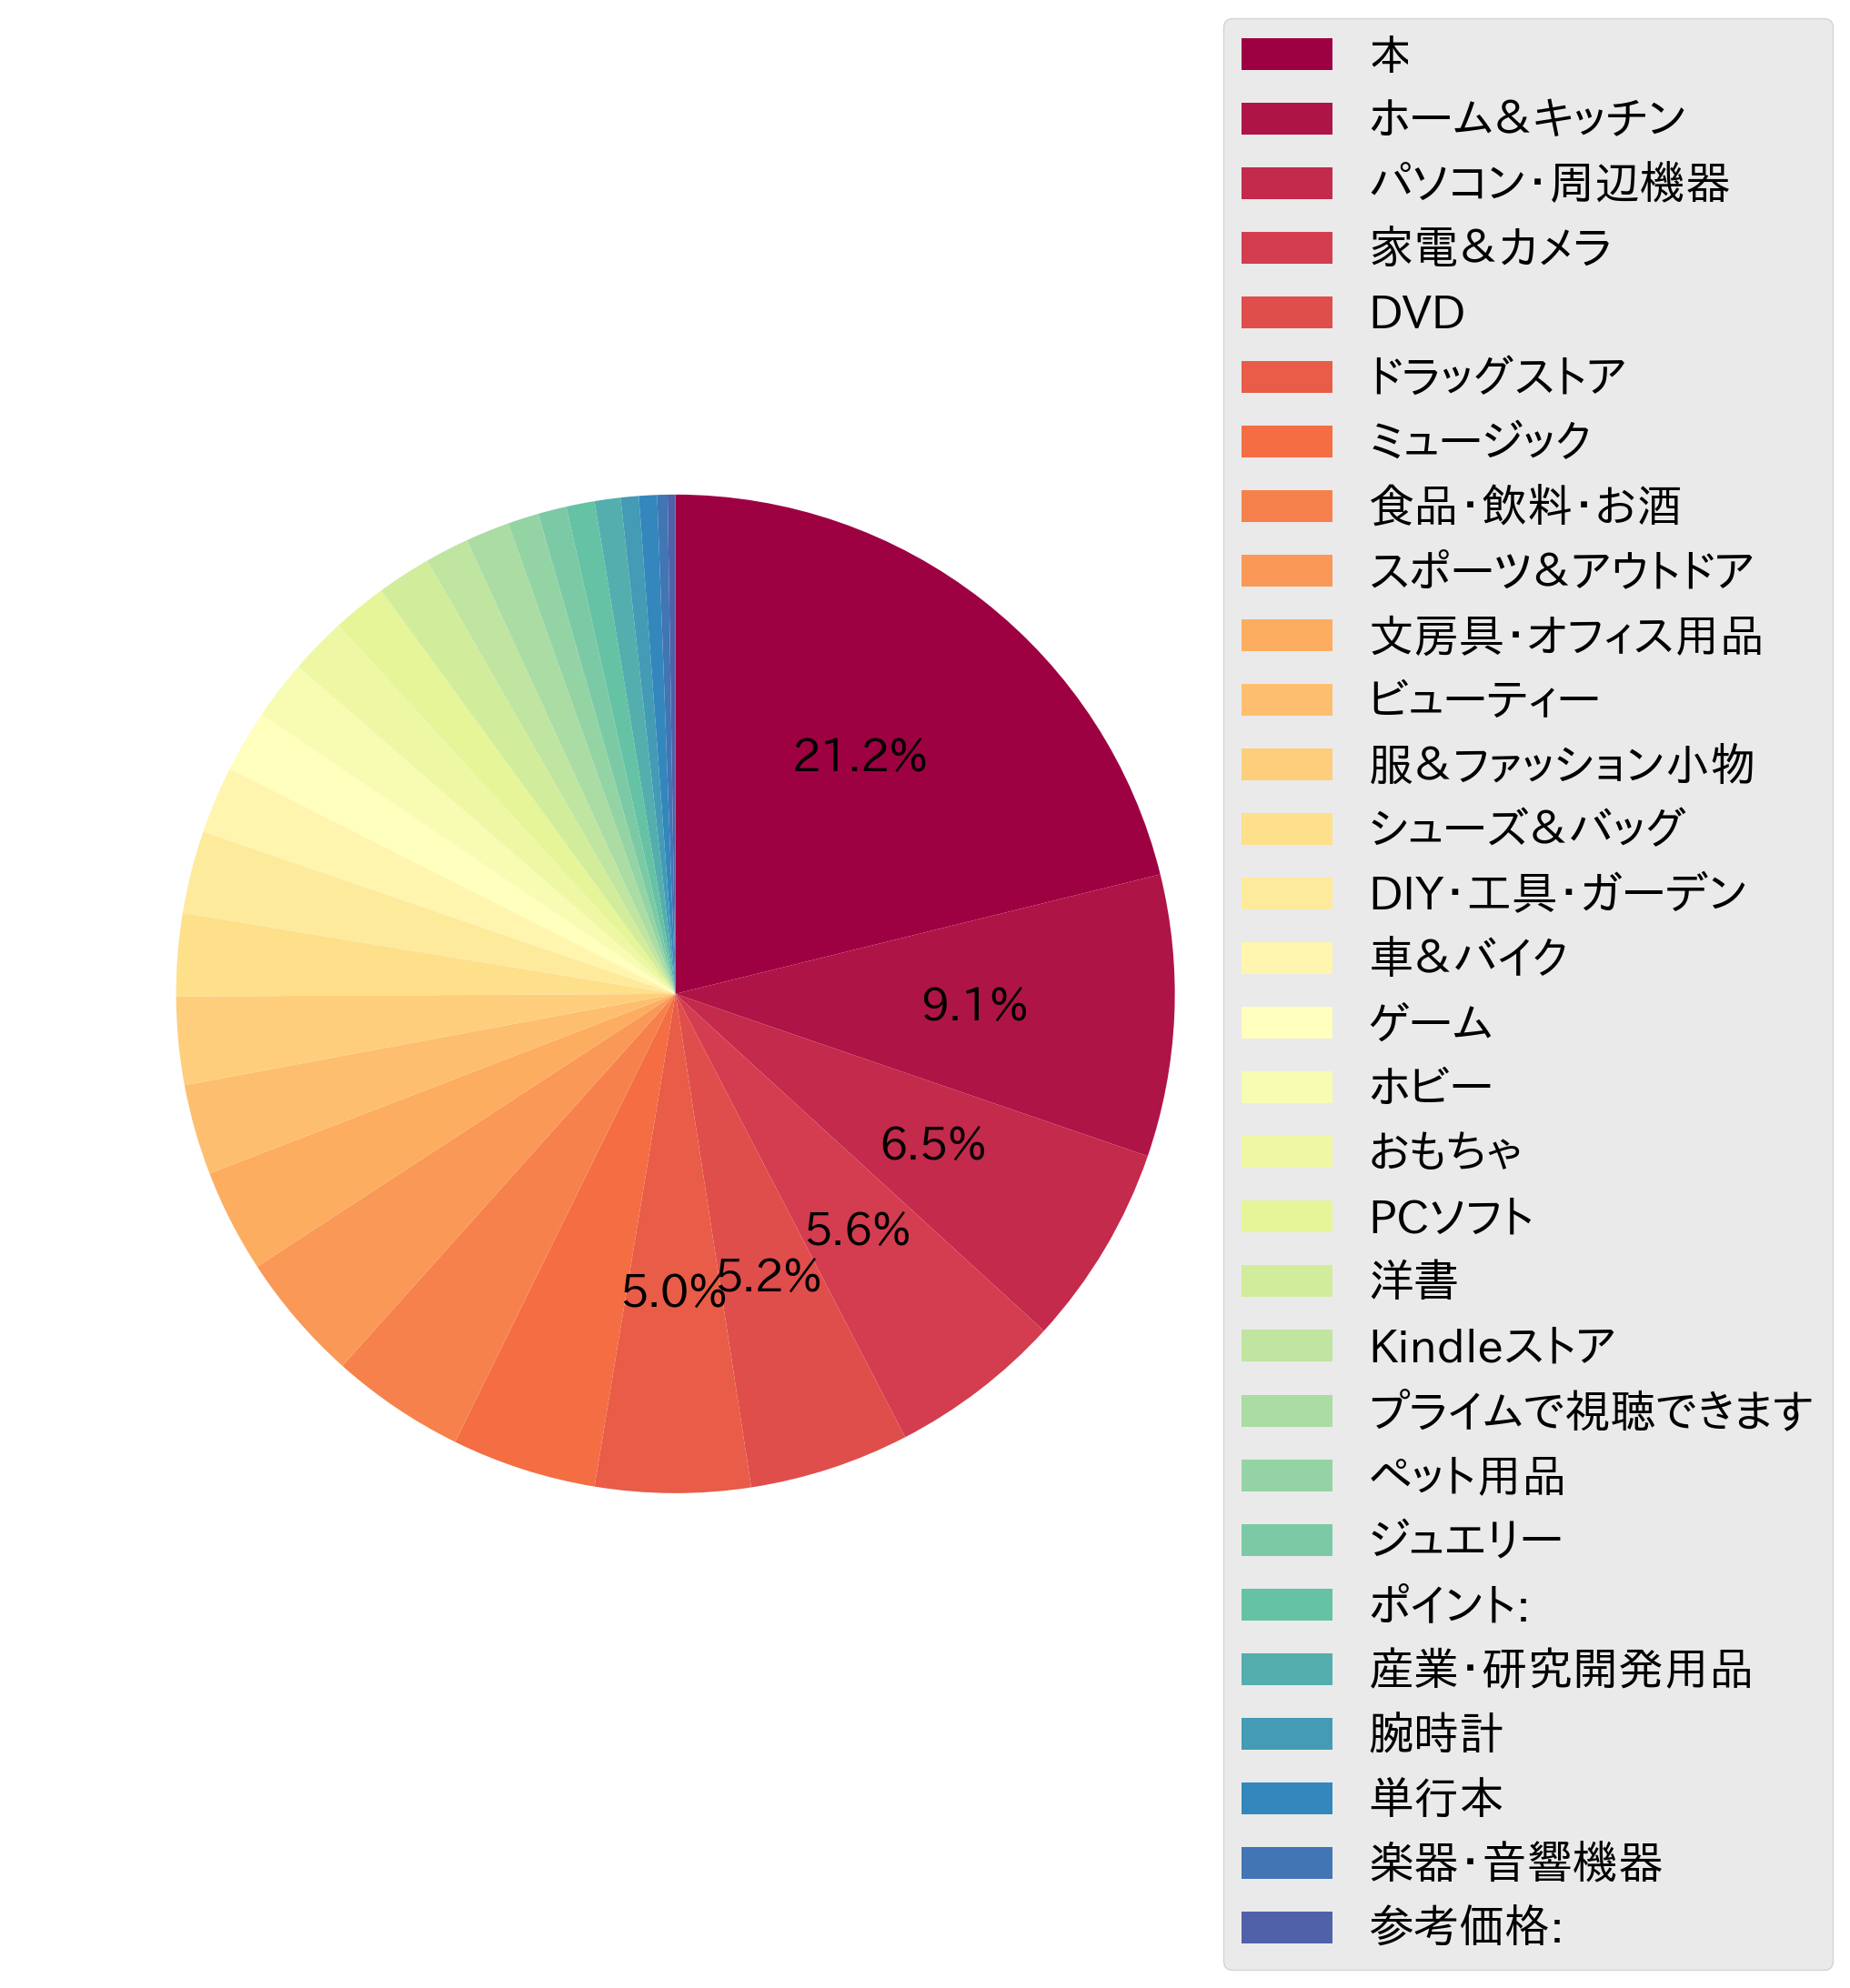

In [10]:
create_pie_fig(Hcounts,Hvalues,'高評価category1.png')

In [31]:
book_category_txt='''
select distinct category2,id from product_text
where category1=='本' 
'''

l_book_values,l_book_counts=sql_to_value_count(Lc2,book_category_txt,category_num=20)
h_book_values,h_book_counts=sql_to_value_count(Hc2,book_category_txt,category_num=20)

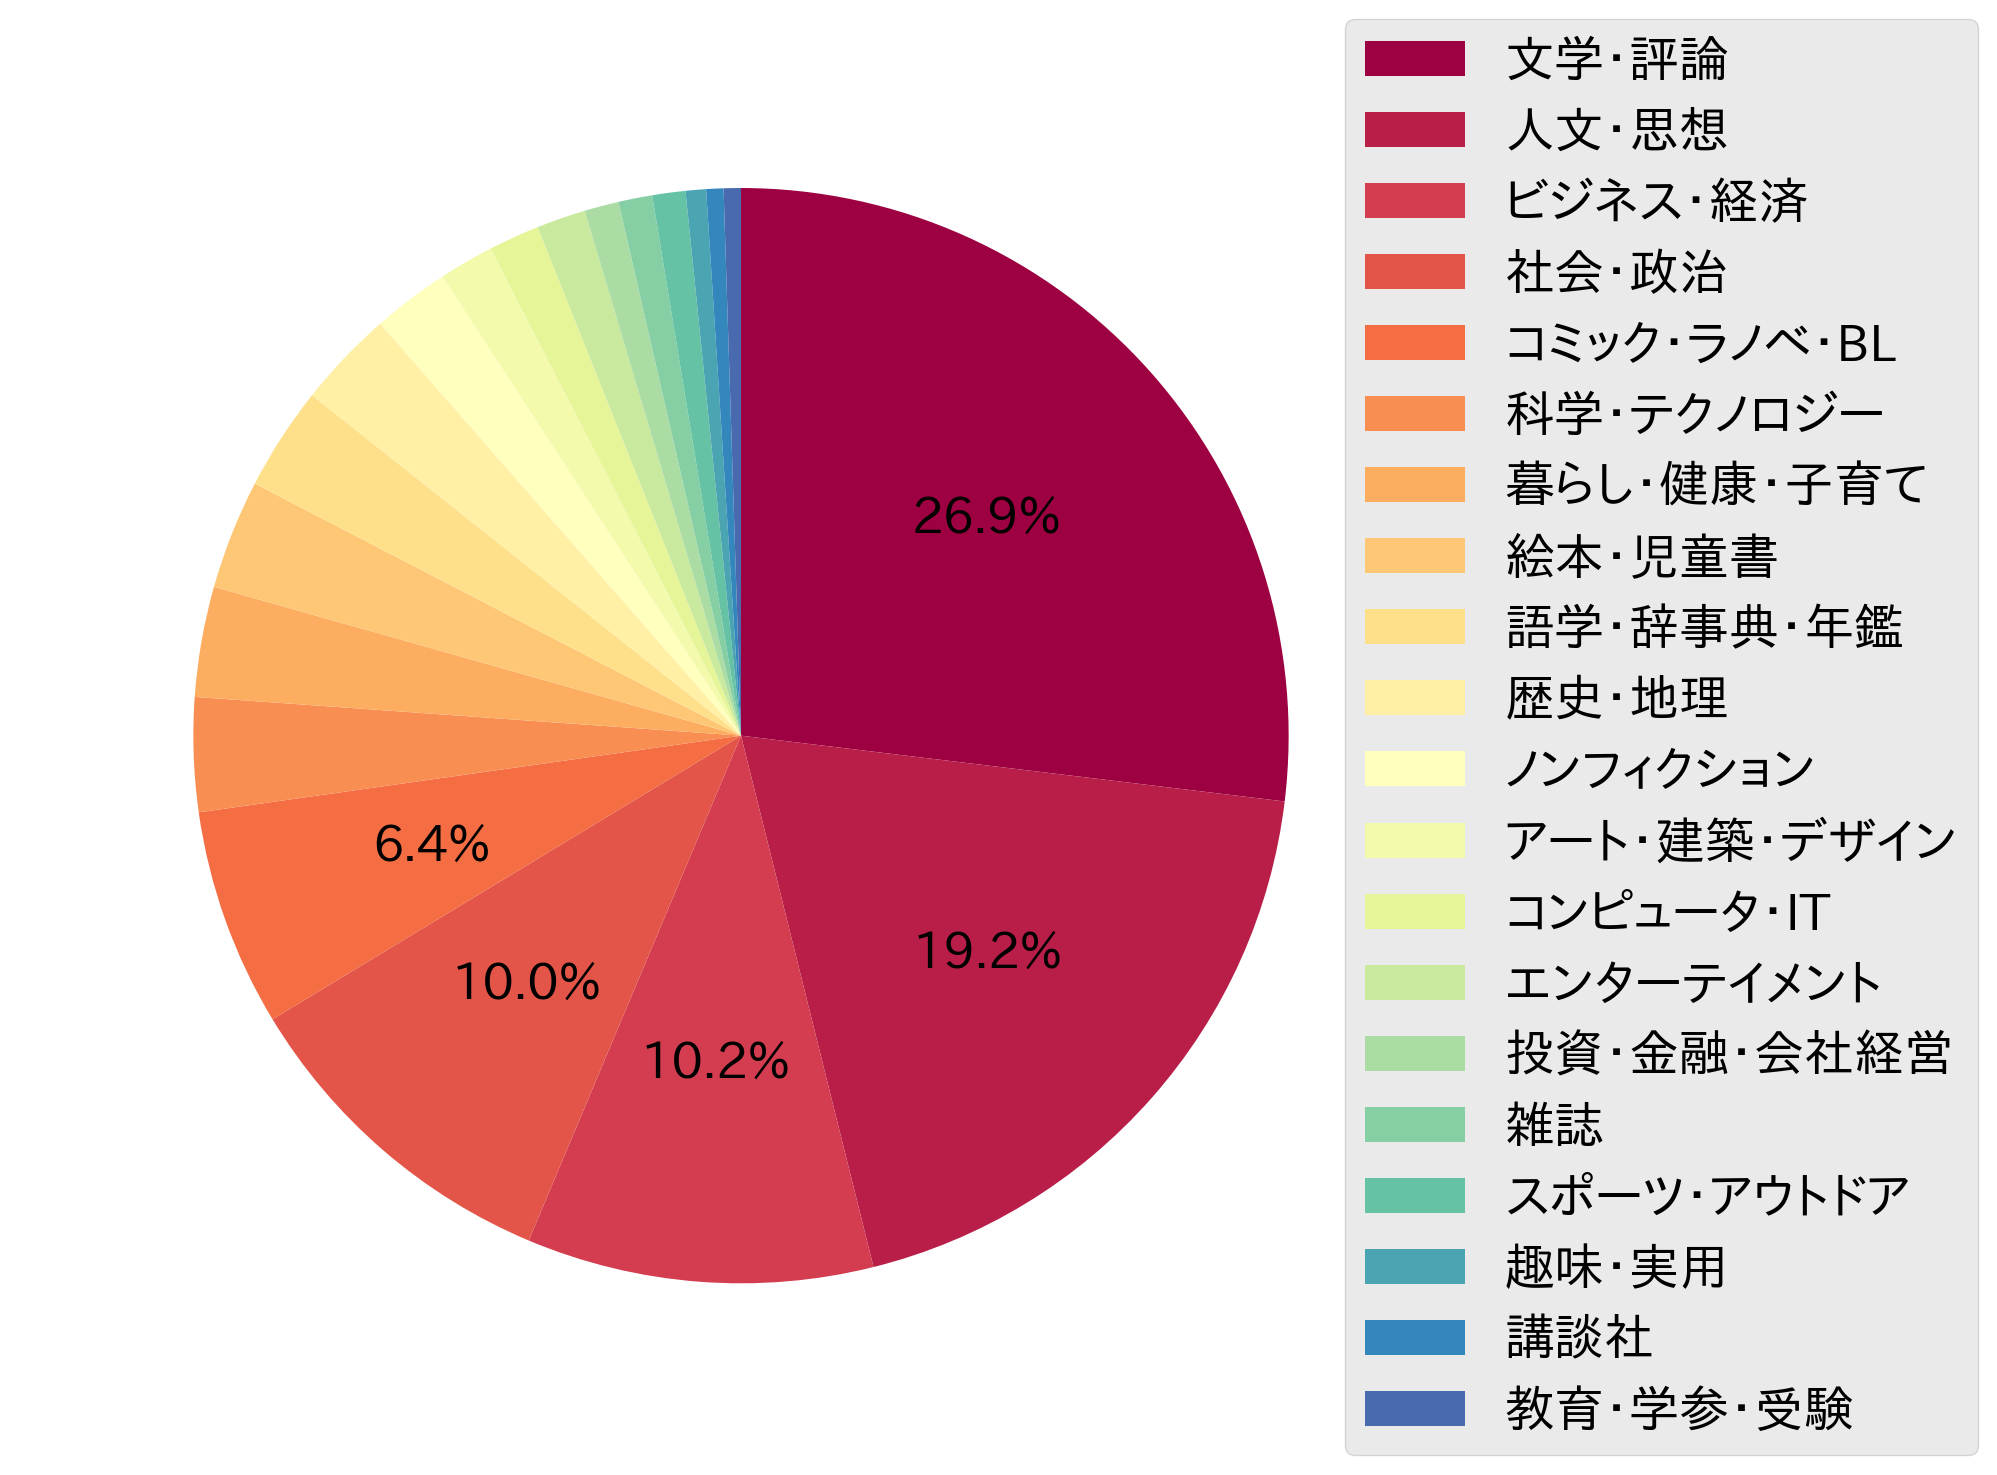

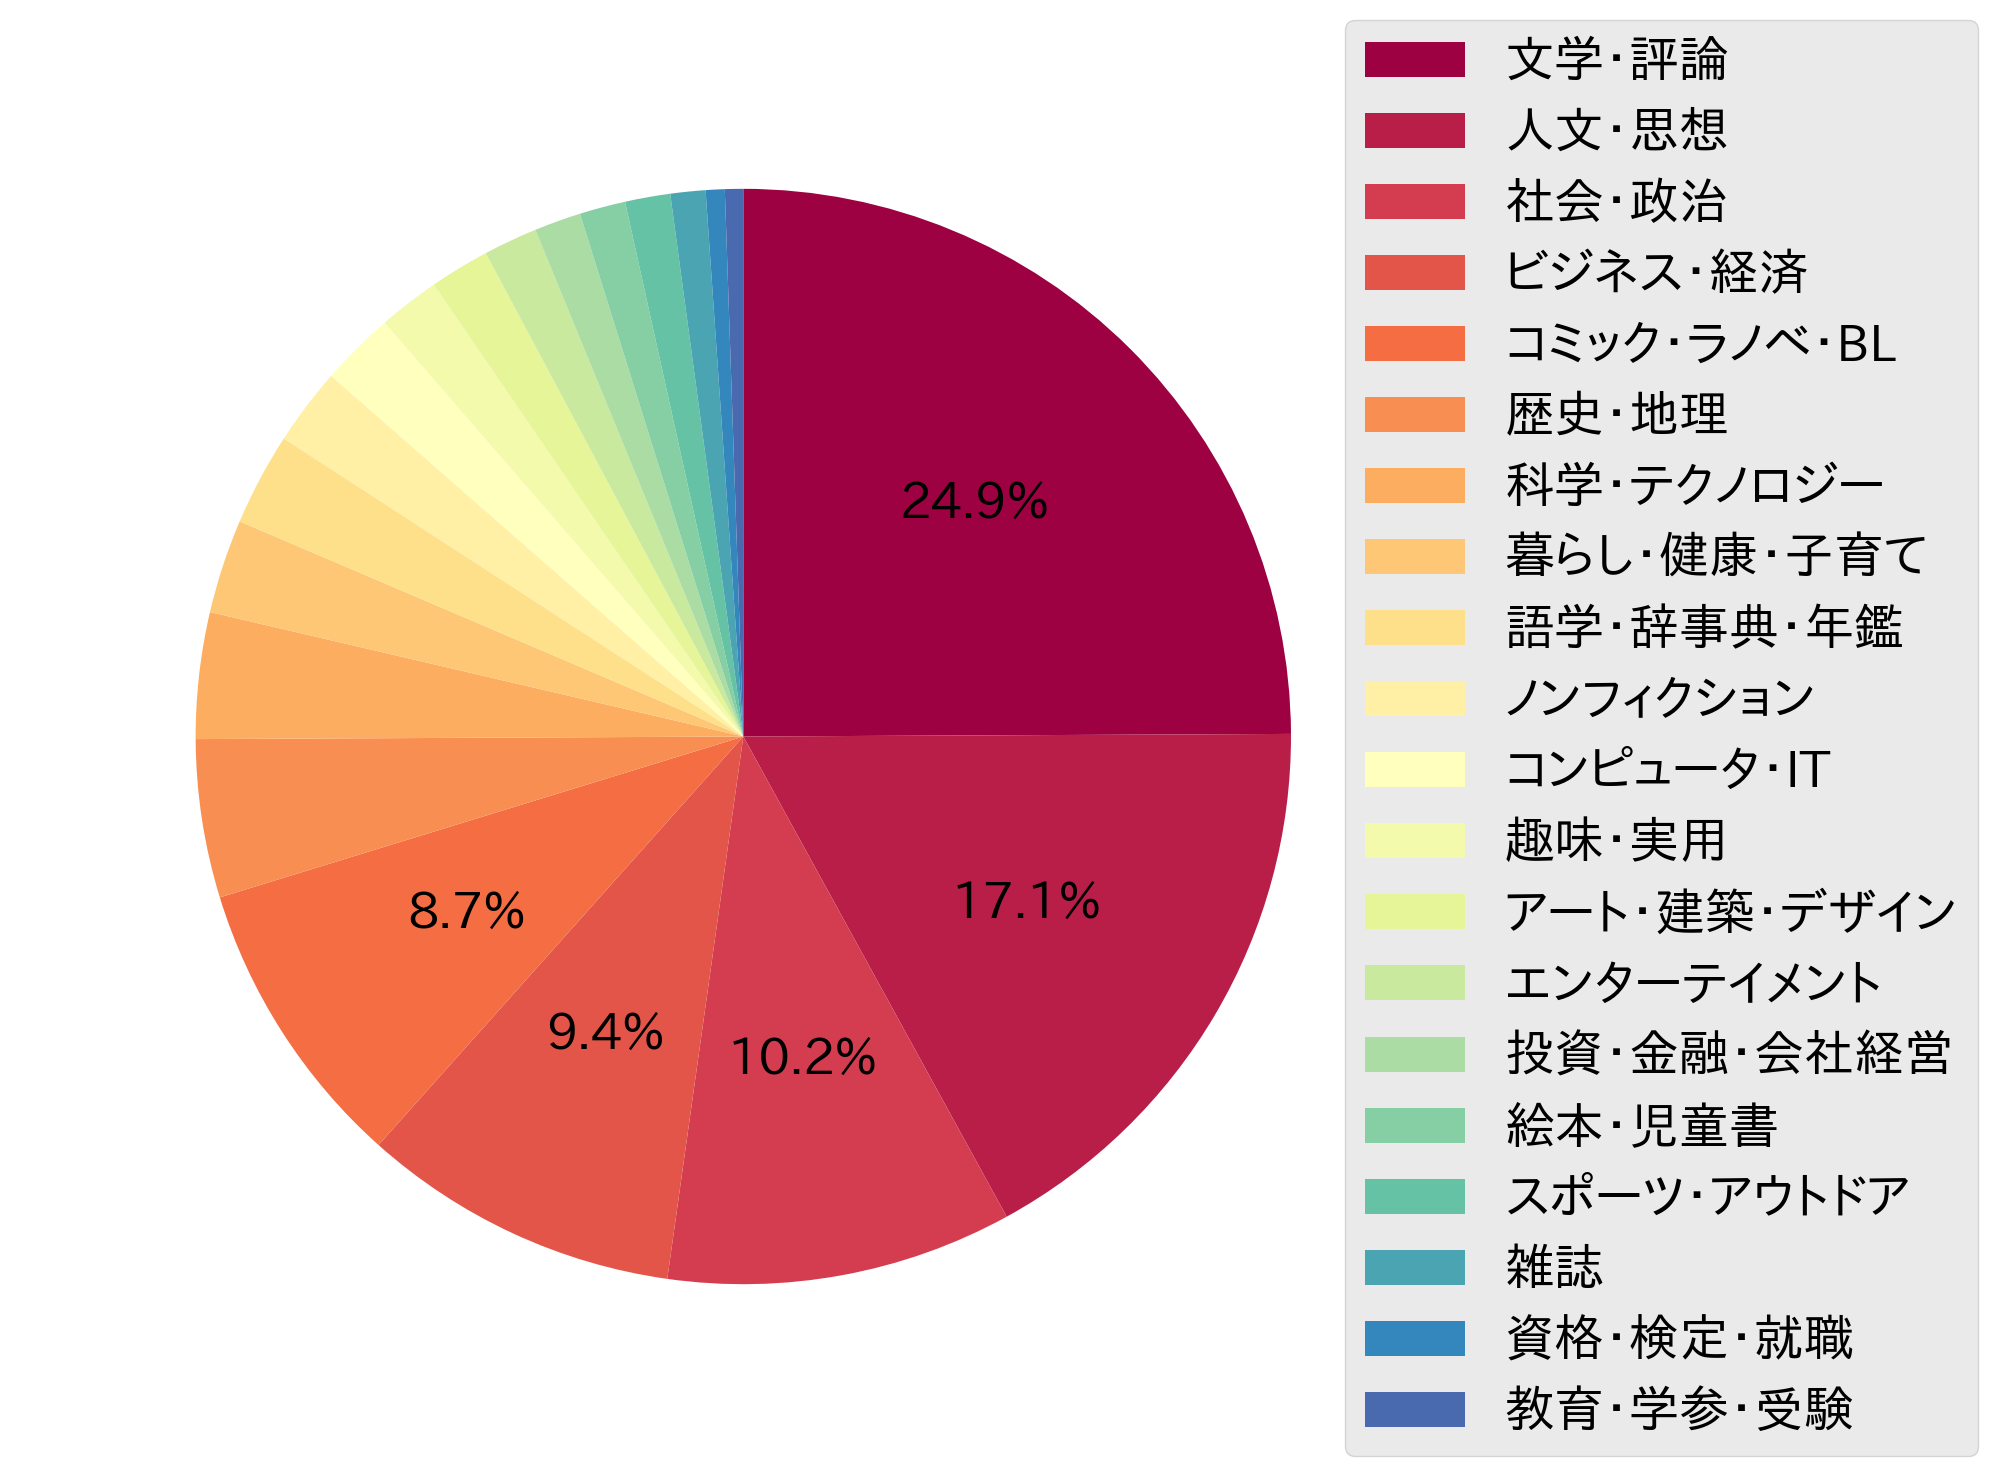

In [32]:
create_pie_fig(h_book_counts,h_book_values,'高評価category2.png')
create_pie_fig(l_book_counts,l_book_values,'低評価category2.png')


In [34]:
print(l_book_values)
print(l_book_counts)
print(h_book_values)
print(h_book_counts)


['文学・評論', '人文・思想', '社会・政治', 'ビジネス・経済', 'コミック・ラノベ・BL', '歴史・地理', '科学・テクノロジー', '暮らし・健康・子育て', '語学・辞事典・年鑑', 'ノンフィクション', 'コンピュータ・IT', '趣味・実用', 'アート・建築・デザイン', 'エンターテイメント', '投資・金融・会社経営', '絵本・児童書', 'スポーツ・アウトドア', '雑誌', '資格・検定・就職', '教育・学参・受験']
(1158, 794, 474, 436, 402, 217, 173, 129, 127, 106, 102, 84, 82, 74, 64, 63, 62, 48, 26, 25)
['文学・評論', '人文・思想', 'ビジネス・経済', '社会・政治', 'コミック・ラノベ・BL', '科学・テクノロジー', '暮らし・健康・子育て', '絵本・児童書', '語学・辞事典・年鑑', '歴史・地理', 'ノンフィクション', 'アート・建築・デザイン', 'コンピュータ・IT', 'エンターテイメント', '投資・金融・会社経営', '雑誌', 'スポーツ・アウトドア', '趣味・実用', '講談社', '教育・学参・受験']
(1432, 1021, 544, 532, 342, 179, 173, 172, 163, 153, 121, 86, 80, 77, 54, 53, 52, 32, 27, 27)


In [43]:
Hc2.execute('''select distinct baka_star,category2,id from product_text where category1=='本' ''')

i=0
for row in Hc2:
    print(row)
    i+=1
    if i==1000:
        break


(5.0, '人文・思想', 4)
(4.0, '人文・思想', 90)
(4.0, '社会・政治', 102)
(4.0, '文学・評論', 104)
(4.0, '人文・思想', 105)
(4.0, '人文・思想', 106)
(4.0, '文学・評論', 107)
(4.0, '暮らし・健康・子育て', 115)
(4.0, '文学・評論', 118)
(4.0, '文学・評論', 121)
(4.0, '文学・評論', 123)
(4.0, '文学・評論', 124)
(4.0, '文学・評論', 125)
(4.0, '暮らし・健康・子育て', 126)
(4.0, '文学・評論', 129)
(4.0, '文学・評論', 131)
(4.0, '文学・評論', 140)
(4.0, '講談社', 141)
(4.0, '文学・評論', 144)
(4.0, '文学・評論', 145)
(4.0, '文学・評論', 146)
(4.0, '文学・評論', 147)
(4.0, '文学・評論', 148)
(4.0, '文学・評論', 149)
(4.0, '人文・思想', 150)
(4.0, '文学・評論', 153)
(4.0, '暮らし・健康・子育て', 154)
(4.0, '文学・評論', 155)
(4.0, '文学・評論', 156)
(4.0, '文学・評論', 158)
(4.0, '文学・評論', 159)
(4.0, '文学・評論', 160)
(4.0, '文学・評論', 161)
(4.0, '暮らし・健康・子育て', 167)
(4.0, 'ビジネス・経済', 168)
(4.0, '文学・評論', 169)
(4.0, '人文・思想', 170)
(4.0, '趣味・実用', 171)
(4.0, '人文・思想', 172)
(4.0, 'エンターテイメント', 173)
(4.0, '文学・評論', 174)
(4.0, 'ビジネス・経済', 175)
(4.0, 'ビジネス・経済', 176)
(4.0, '暮らし・健康・子育て', 177)
(4.0, '文学・評論', 178)
(4.0, '文学・評論', 179)
(4.0, '文学・評論', 180)
(4.0, '文学・評論', 181)
(4.0, '文学・

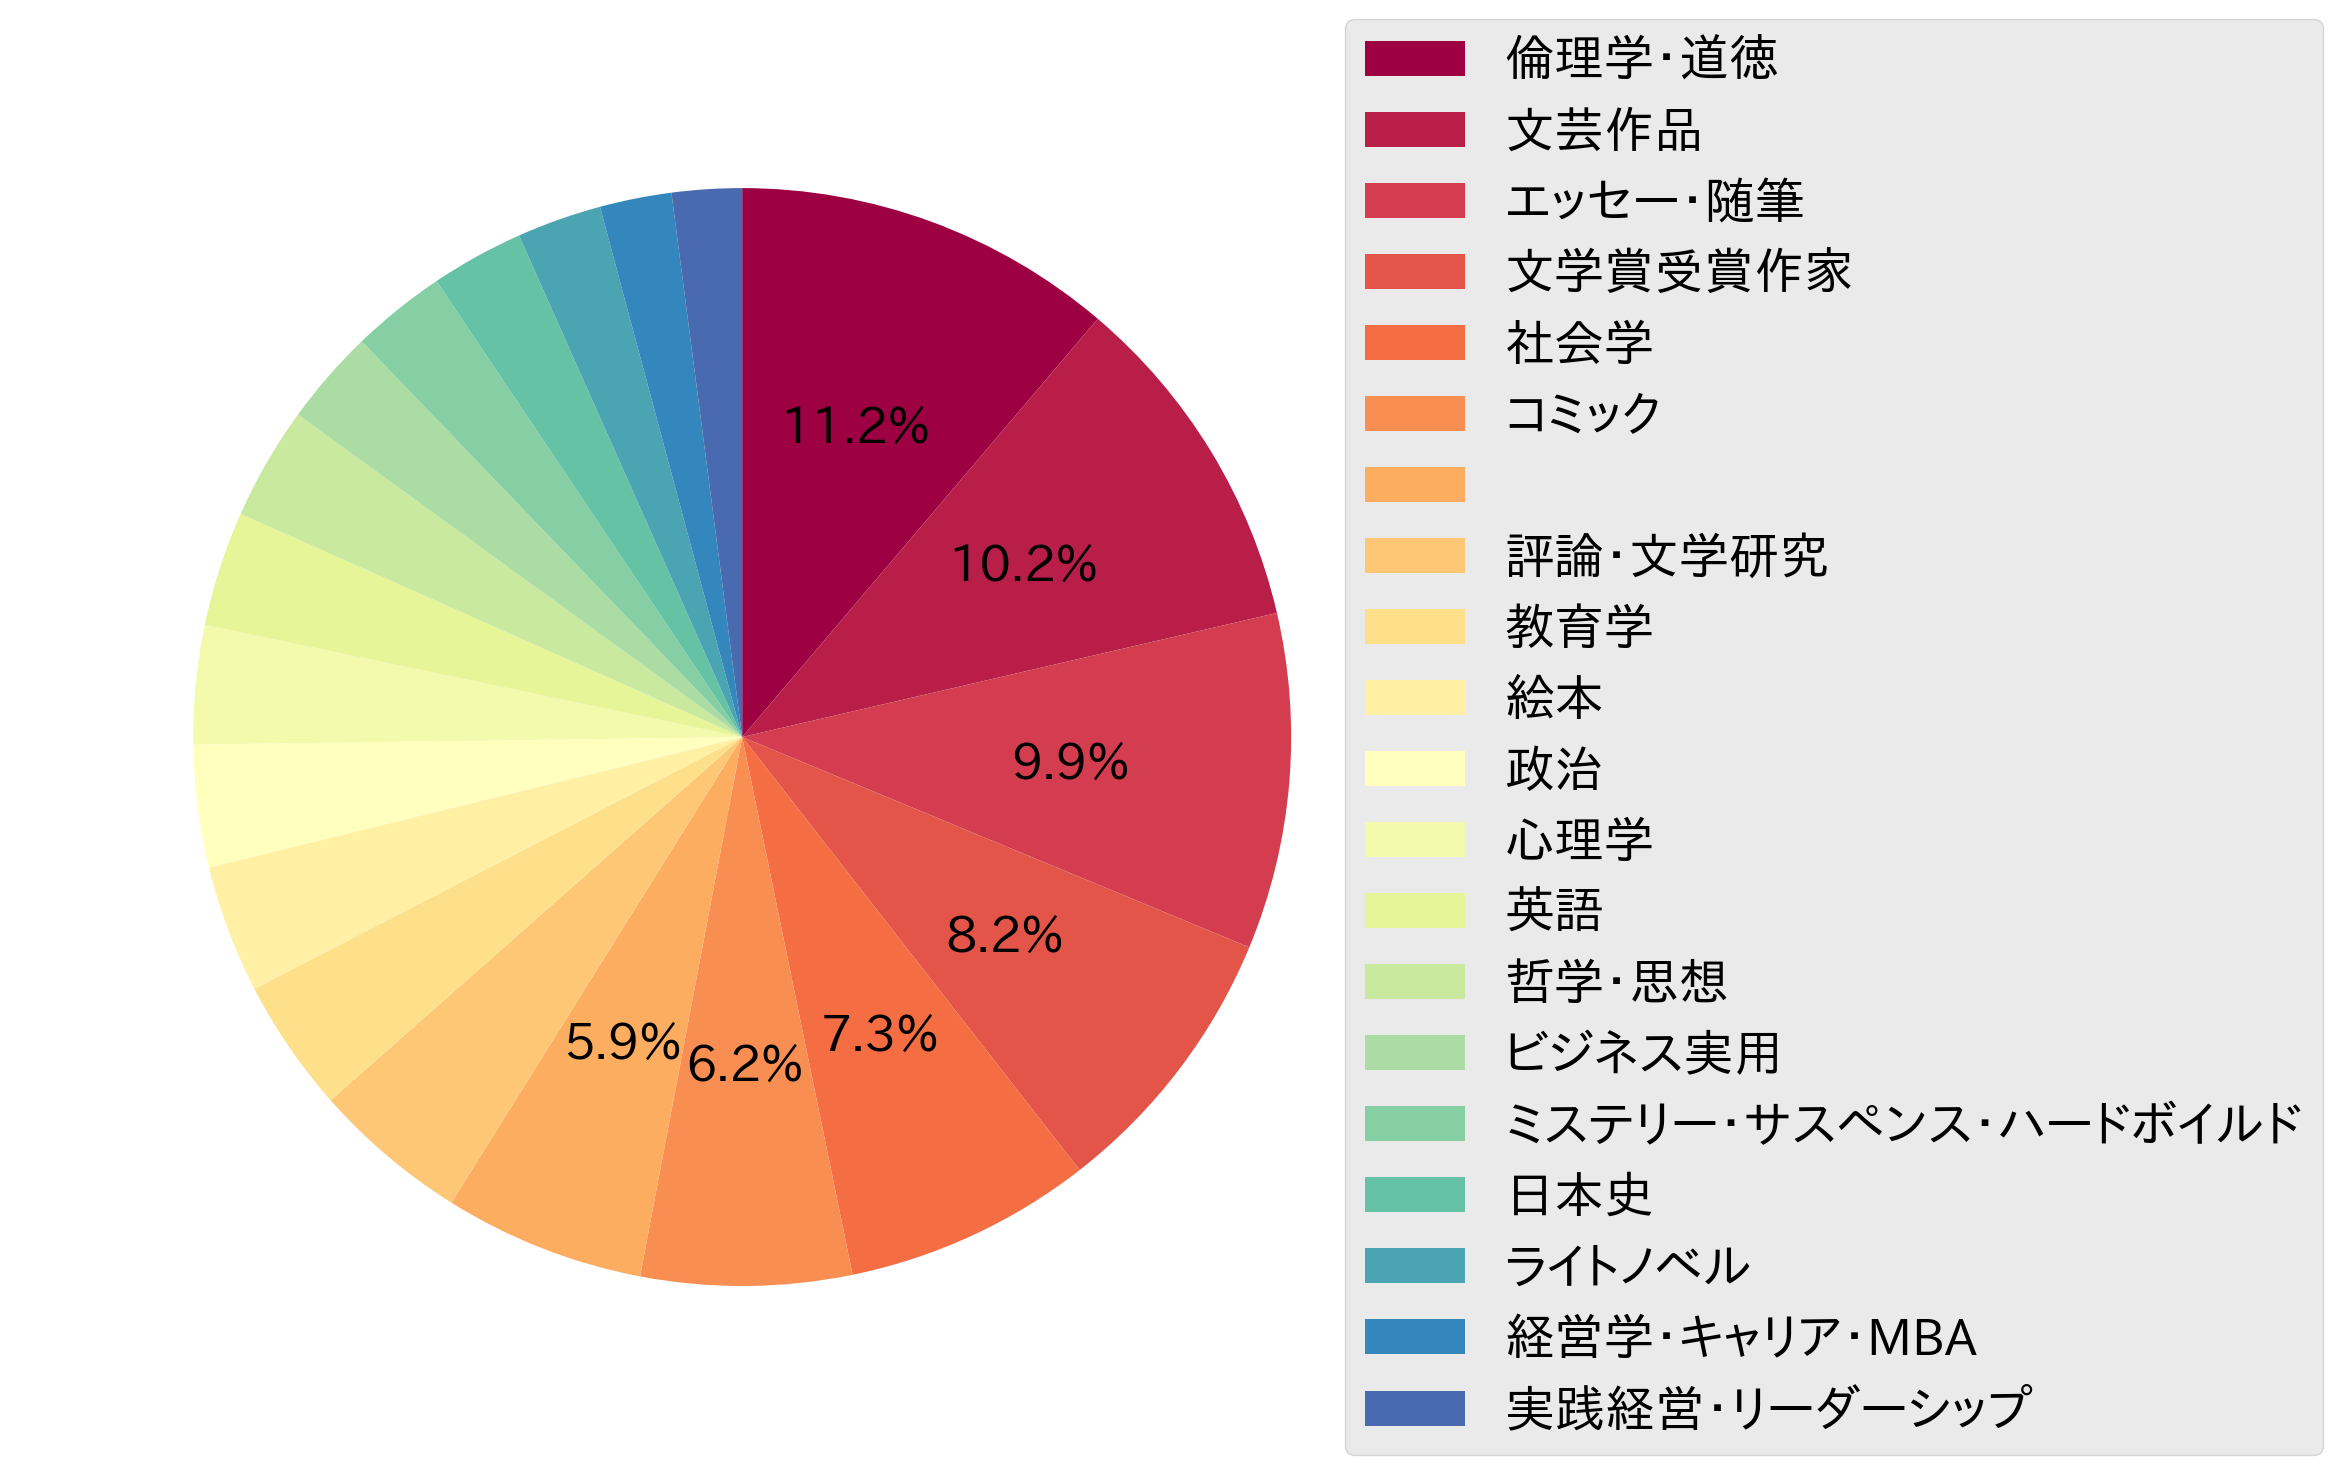

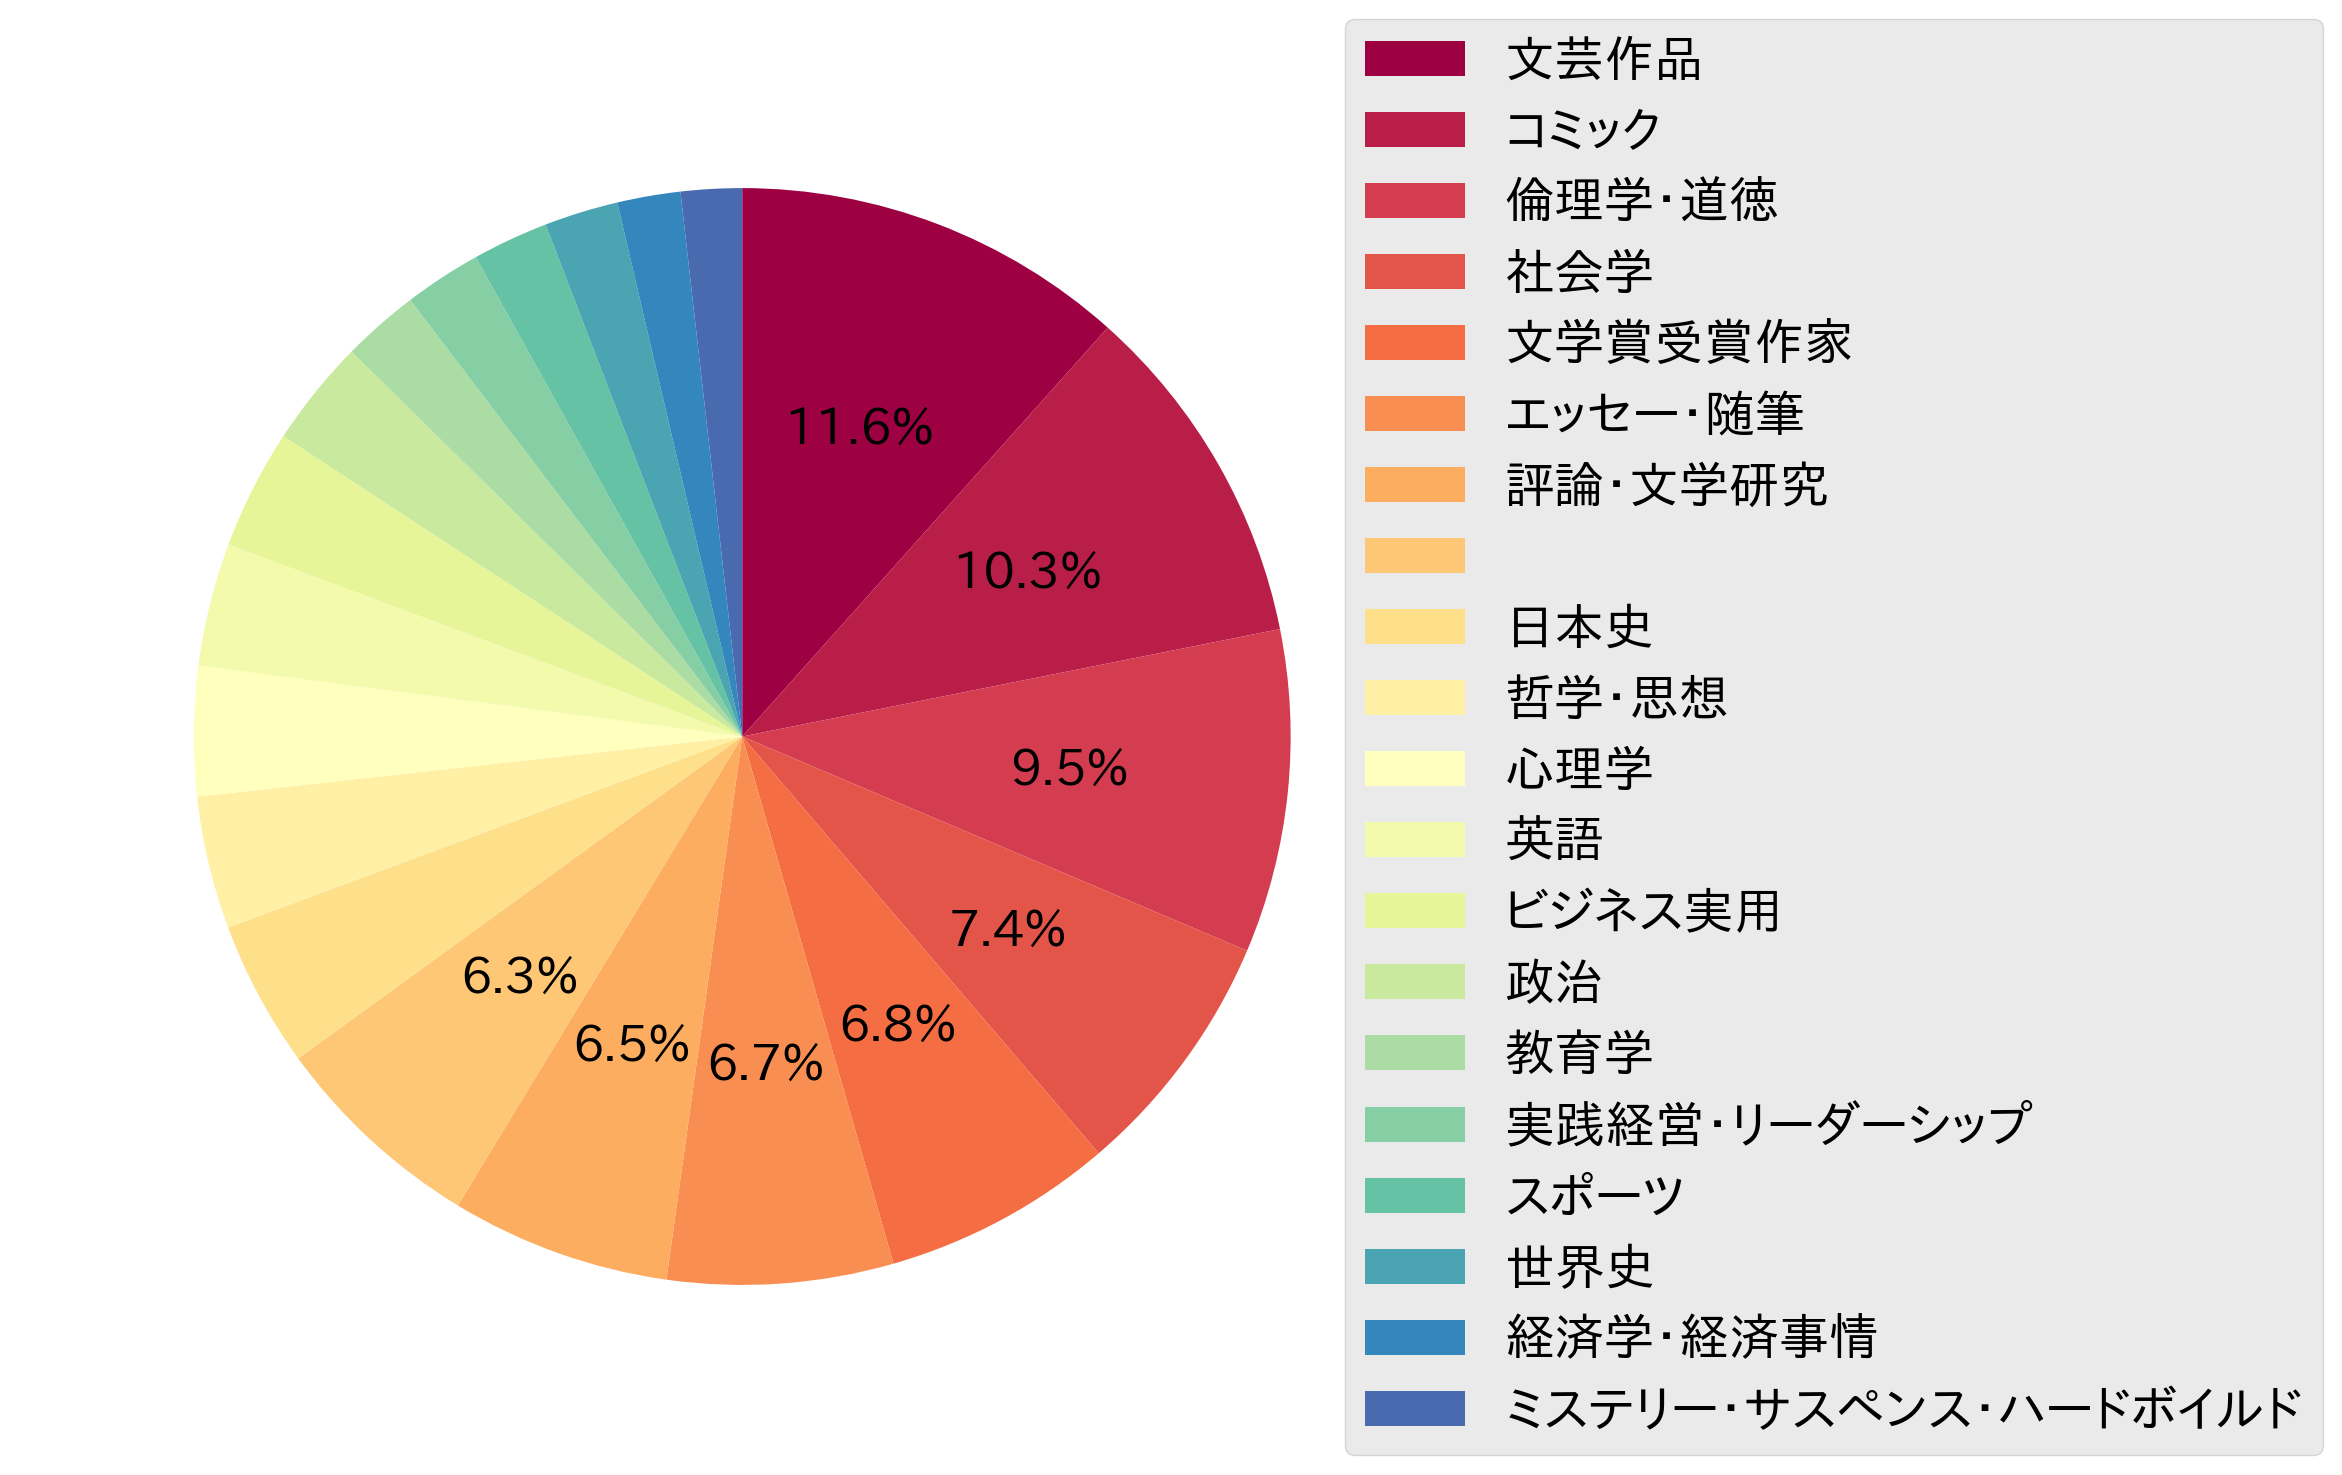

In [44]:
book_category_txt='''
select distinct category3,id from product_text
where category1=='本' 
'''

l2_book_values,l2_book_counts=sql_to_value_count(Lc2,book_category_txt,category_num=20)
h2_book_values,h2_book_counts=sql_to_value_count(Hc2,book_category_txt,category_num=20)

create_pie_fig(h2_book_counts,h2_book_values,'高評価category3.png')
create_pie_fig(l2_book_counts,l2_book_values,'低評価category3.png')